In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# Import the library

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# Set the random seed
seed = int(time.time())

# Set path
train_path = "/kaggle/input/digit-recognizer/train.csv"
test_path = "/kaggle/input/digit-recognizer/test.csv"
output_root = "/kaggle/working/"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Read data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Accuracy Score: 0.9714285714285714
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       811
           1       0.97      0.99      0.98       938
           2       0.99      0.95      0.97       836
           3       0.96      0.97      0.97       864
           4       0.98      0.97      0.97       858
           5       0.96      0.97      0.96       764
           6       0.98      0.99      0.99       831
           7       0.96      0.98      0.97       839
           8       0.99      0.94      0.96       846
           9       0.94      0.96      0.95       813

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



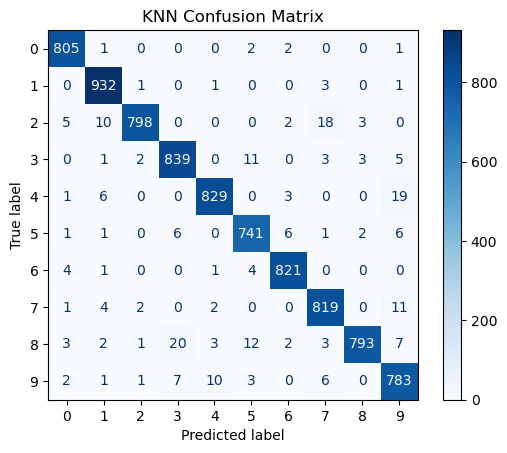

In [12]:
X = train_df.drop("label", axis=1).values
y = train_df["label"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

# PCA dimension reduction
pca = PCA(n_components=95, random_state=seed)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

# Set model parameters
params = {
    "n_neighbors": 4,
    "weights": "distance",
    "algorithm": "auto",
    "p": 2
}

# Build a model
clf = KNeighborsClassifier(**params)
clf.fit(X_train, y_train)

# Test classification effect
y_val_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_val_pred)
cr = classification_report(y_val, y_val_pred)

print(f"Accuracy Score: {acc}")
print(f"Classification Report: \n{cr}")

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

In [10]:
# Predict the outcome
X_test = pca.transform(test_df.values)
pred_df = pd.DataFrame({"ImageId": test_df.index + 1, "Label": clf.predict(X_test)})
pred_df.to_csv(f"{output_root}submission_{seed}.csv", index=False)
pred_df.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
